In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Dataset_train_padel_edited.csv', sep=',')
df_test = pd.read_csv('Dataset_test_padel_edited.csv', sep=',')

In [3]:
df_train

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,active
0,0,0.2233,0.049863,70.0534,76.025376,12,13,66,34,32,...,71.201670,2.094167,18.726043,12.038283,6.687760,3392.0,73.0,9.561,198.0,0.0
1,1,-0.2439,0.059487,14.3849,35.047516,12,12,29,17,12,...,34.154841,2.009108,7.396095,7.396095,0.000000,530.0,24.0,5.852,84.0,0.0
2,0,-0.6813,0.464170,42.7040,62.218688,18,18,49,33,16,...,67.163315,2.035252,33.832420,12.421201,15.403882,3502.0,53.0,5.992,176.0,1.0
3,2,0.2023,0.040925,44.9687,71.669860,23,24,56,36,20,...,72.666696,2.018519,36.153491,12.057732,9.505728,4274.0,60.0,5.230,194.0,1.0
4,1,2.0771,4.314344,159.7139,117.142373,6,6,107,46,61,...,93.603246,2.034853,12.958770,9.916845,3.041925,7511.0,100.0,13.527,270.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,0,-0.4369,0.190882,49.6836,30.143102,0,0,28,14,14,...,28.014526,2.001038,10.593134,10.593134,0.000000,266.0,23.0,-1.060,74.0,1.0
2617,1,-8.6979,75.653464,122.6846,113.445994,9,10,106,48,58,...,94.996453,1.979093,32.060122,14.860270,17.199852,10085.0,65.0,6.591,222.0,0.0
2618,0,-0.0984,0.009683,59.6578,74.620274,21,22,59,41,18,...,83.091605,2.026625,44.040188,12.459157,12.378858,5790.0,69.0,5.298,230.0,1.0
2619,2,0.8957,0.802278,31.3194,88.960204,33,35,71,43,28,...,88.708828,2.062996,25.012148,7.035760,9.898856,6245.0,77.0,13.130,238.0,1.0


In [4]:
activeValue = (df_train.active==1.0).sum()
nonactiveValue = (df_train.active==0.0).sum()

In [5]:
activeValue

1407

In [6]:
nonactiveValue

1214

In [7]:
df_test

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,active
0,0,-0.8246,0.679965,30.8082,58.953446,19,22,49,27,22,...,56.905772,2.107621,12.852939,6.286213,6.566726,2162.0,40.0,5.853,148.0,1.0
1,0,-0.1388,0.019265,26.5318,60.611446,21,24,48,26,22,...,53.950565,2.075022,5.706052,2.524466,0.000000,1746.0,41.0,9.201,138.0,1.0
2,2,-0.9673,0.935669,191.7513,127.715131,0,0,120,53,67,...,107.184976,2.022358,29.004188,25.990040,3.014148,11700.0,116.0,8.505,304.0,1.0
3,0,-0.5162,0.266462,86.4240,114.598134,30,30,93,55,38,...,111.591161,2.028930,39.705534,27.344229,3.088891,16116.0,80.0,8.885,280.0,1.0
4,0,1.7350,3.010225,81.9806,69.672962,9,10,62,28,34,...,58.031889,2.072567,9.271157,2.567150,6.704006,1770.0,56.0,7.591,166.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,2,-1.4182,2.011291,44.6940,58.103067,15,17,49,30,19,...,61.278840,2.042628,21.524865,18.382871,3.141994,2683.0,48.0,3.565,160.0,1.0
1120,1,-1.0189,1.038157,31.1932,64.971032,21,24,54,30,24,...,61.824667,2.060822,10.982047,10.982047,0.000000,2801.0,46.0,8.771,156.0,1.0
1121,0,-8.5929,73.837930,140.1859,115.544338,0,0,111,45,66,...,90.004484,2.000100,21.859161,21.859161,0.000000,11495.0,56.0,7.914,214.0,0.0
1122,2,-0.9440,0.891136,24.1688,55.960688,20,22,45,29,16,...,59.398386,2.048220,14.893385,14.893385,0.000000,2008.0,54.0,7.252,158.0,0.0


In [8]:
activeValueTest = (df_test.active==1.0).sum()
nonactiveValueTest = (df_test.active==0.0).sum()

In [9]:
activeValueTest

609

In [10]:
nonactiveValueTest

515

In [11]:
ActiveSet = [activeValue, activeValueTest]
NonActiveSet = [nonactiveValue, nonactiveValueTest]

In [12]:
xlabels = ['Train', 'Test'] # masukin list kernel nya yang di pake apa aja
ylabels = np.arange(start=0.5, stop=1, step=0.01)

In [13]:
x = np.arange(len(xlabels))  # yang ini ga usah di ubah
width = 0.35  # lebar bar

fig, ax = plt.subplots(figsize=(10, 8))
plt.gcf().set_dpi(1000)
bar1 = ax.bar(x - 0.35/2, ActiveSet, width, label='Active', color='b')
bar2 = ax.bar(x + 0.35/2, NonActiveSet, width, label='Nonactive', color='g')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Data', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(xlabels, fontsize=12)
plt.yticks(fontsize=12)
ax.legend(fontsize=12, loc=5)

ax.bar_label(bar1, padding=3, fontsize=11)
ax.bar_label(bar2, padding=3, fontsize=11)

plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df_train.loc[:,df_train.columns!='active'].values
# Separating out the target
y = df_train.loc[:,['active']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [28]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [29]:
finalDf = pd.concat([principalDf, df_train[['active']]], axis = 1)

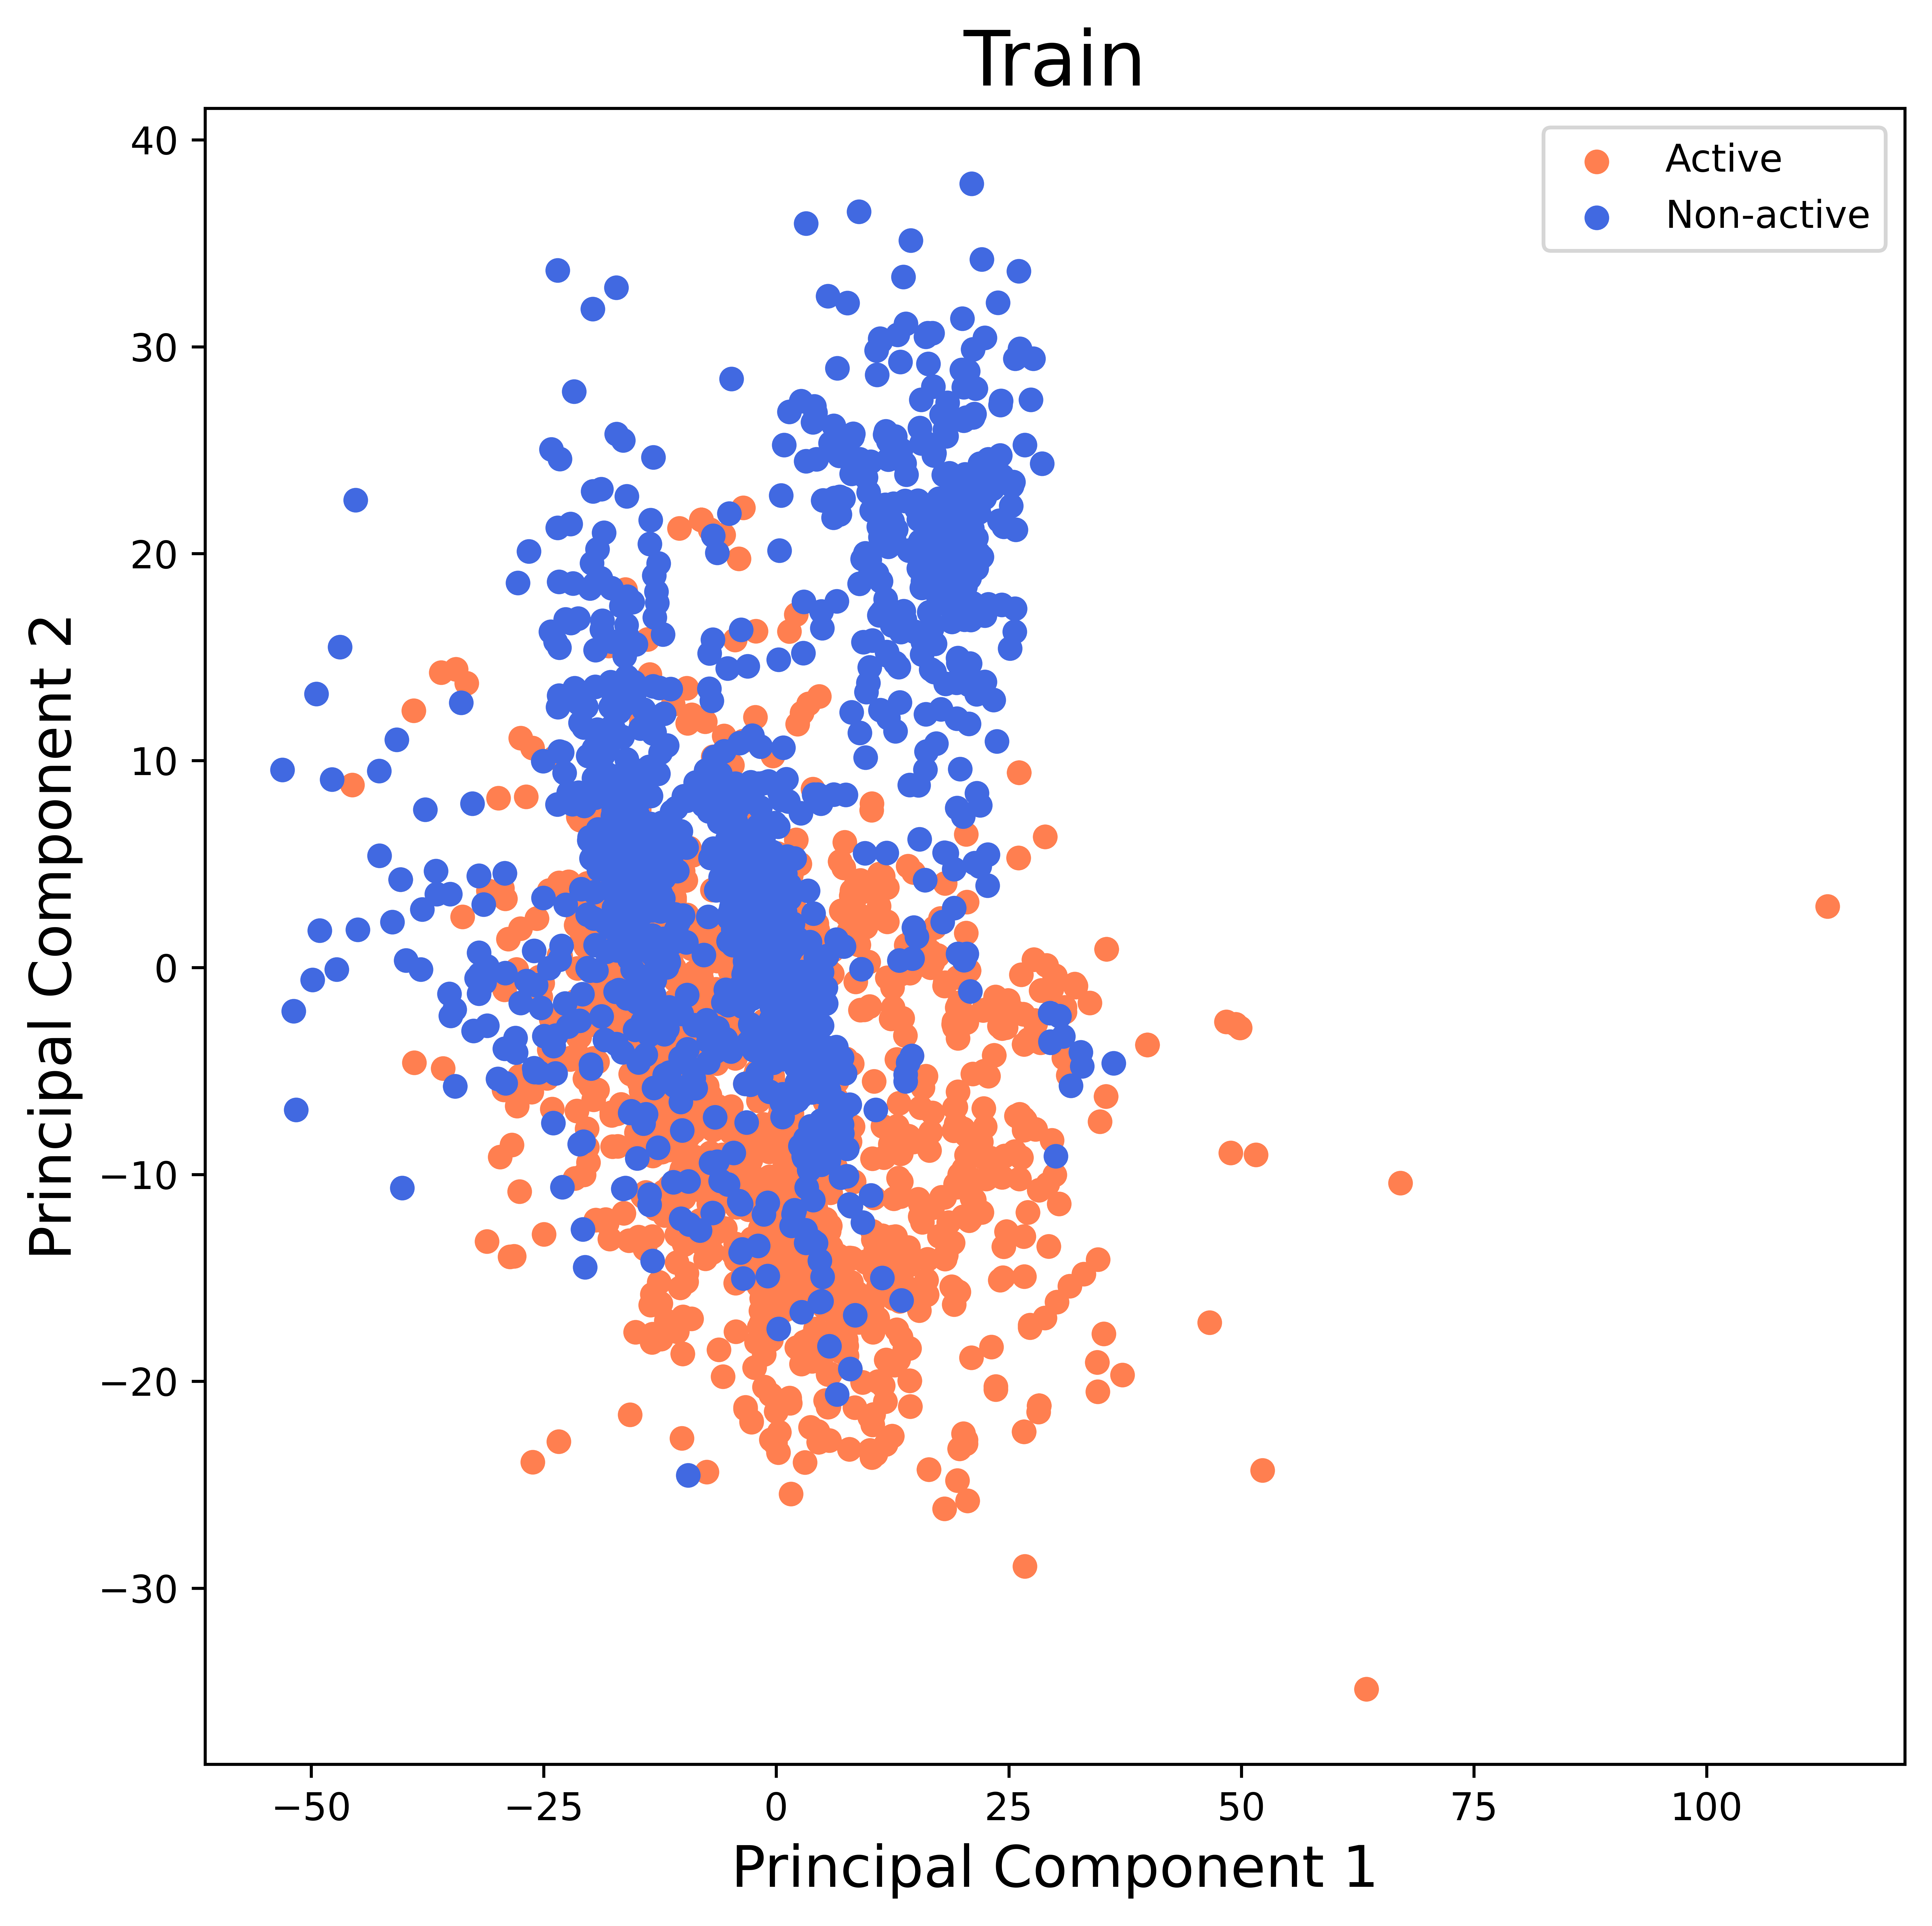

In [30]:
fig = plt.figure(figsize = (8,8), dpi=1000)
ax = fig.add_subplot(1,1,1)
ax.set_title('Train', fontsize = 20)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['Active','Non-active']
finalDf.loc[finalDf['active'] == 0, 'active'] = 'Non-active'
finalDf.loc[finalDf['active'] == 1, 'active'] = 'Active'
colors = ['coral', 'royalblue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['active'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)
ax.legend(targets)

In [31]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df_test.loc[:,df_test.columns!='active'].values
# Separating out the target
y = df_test.loc[:,['active']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [32]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [33]:
finalDf = pd.concat([principalDf, df_test[['active']]], axis = 1)

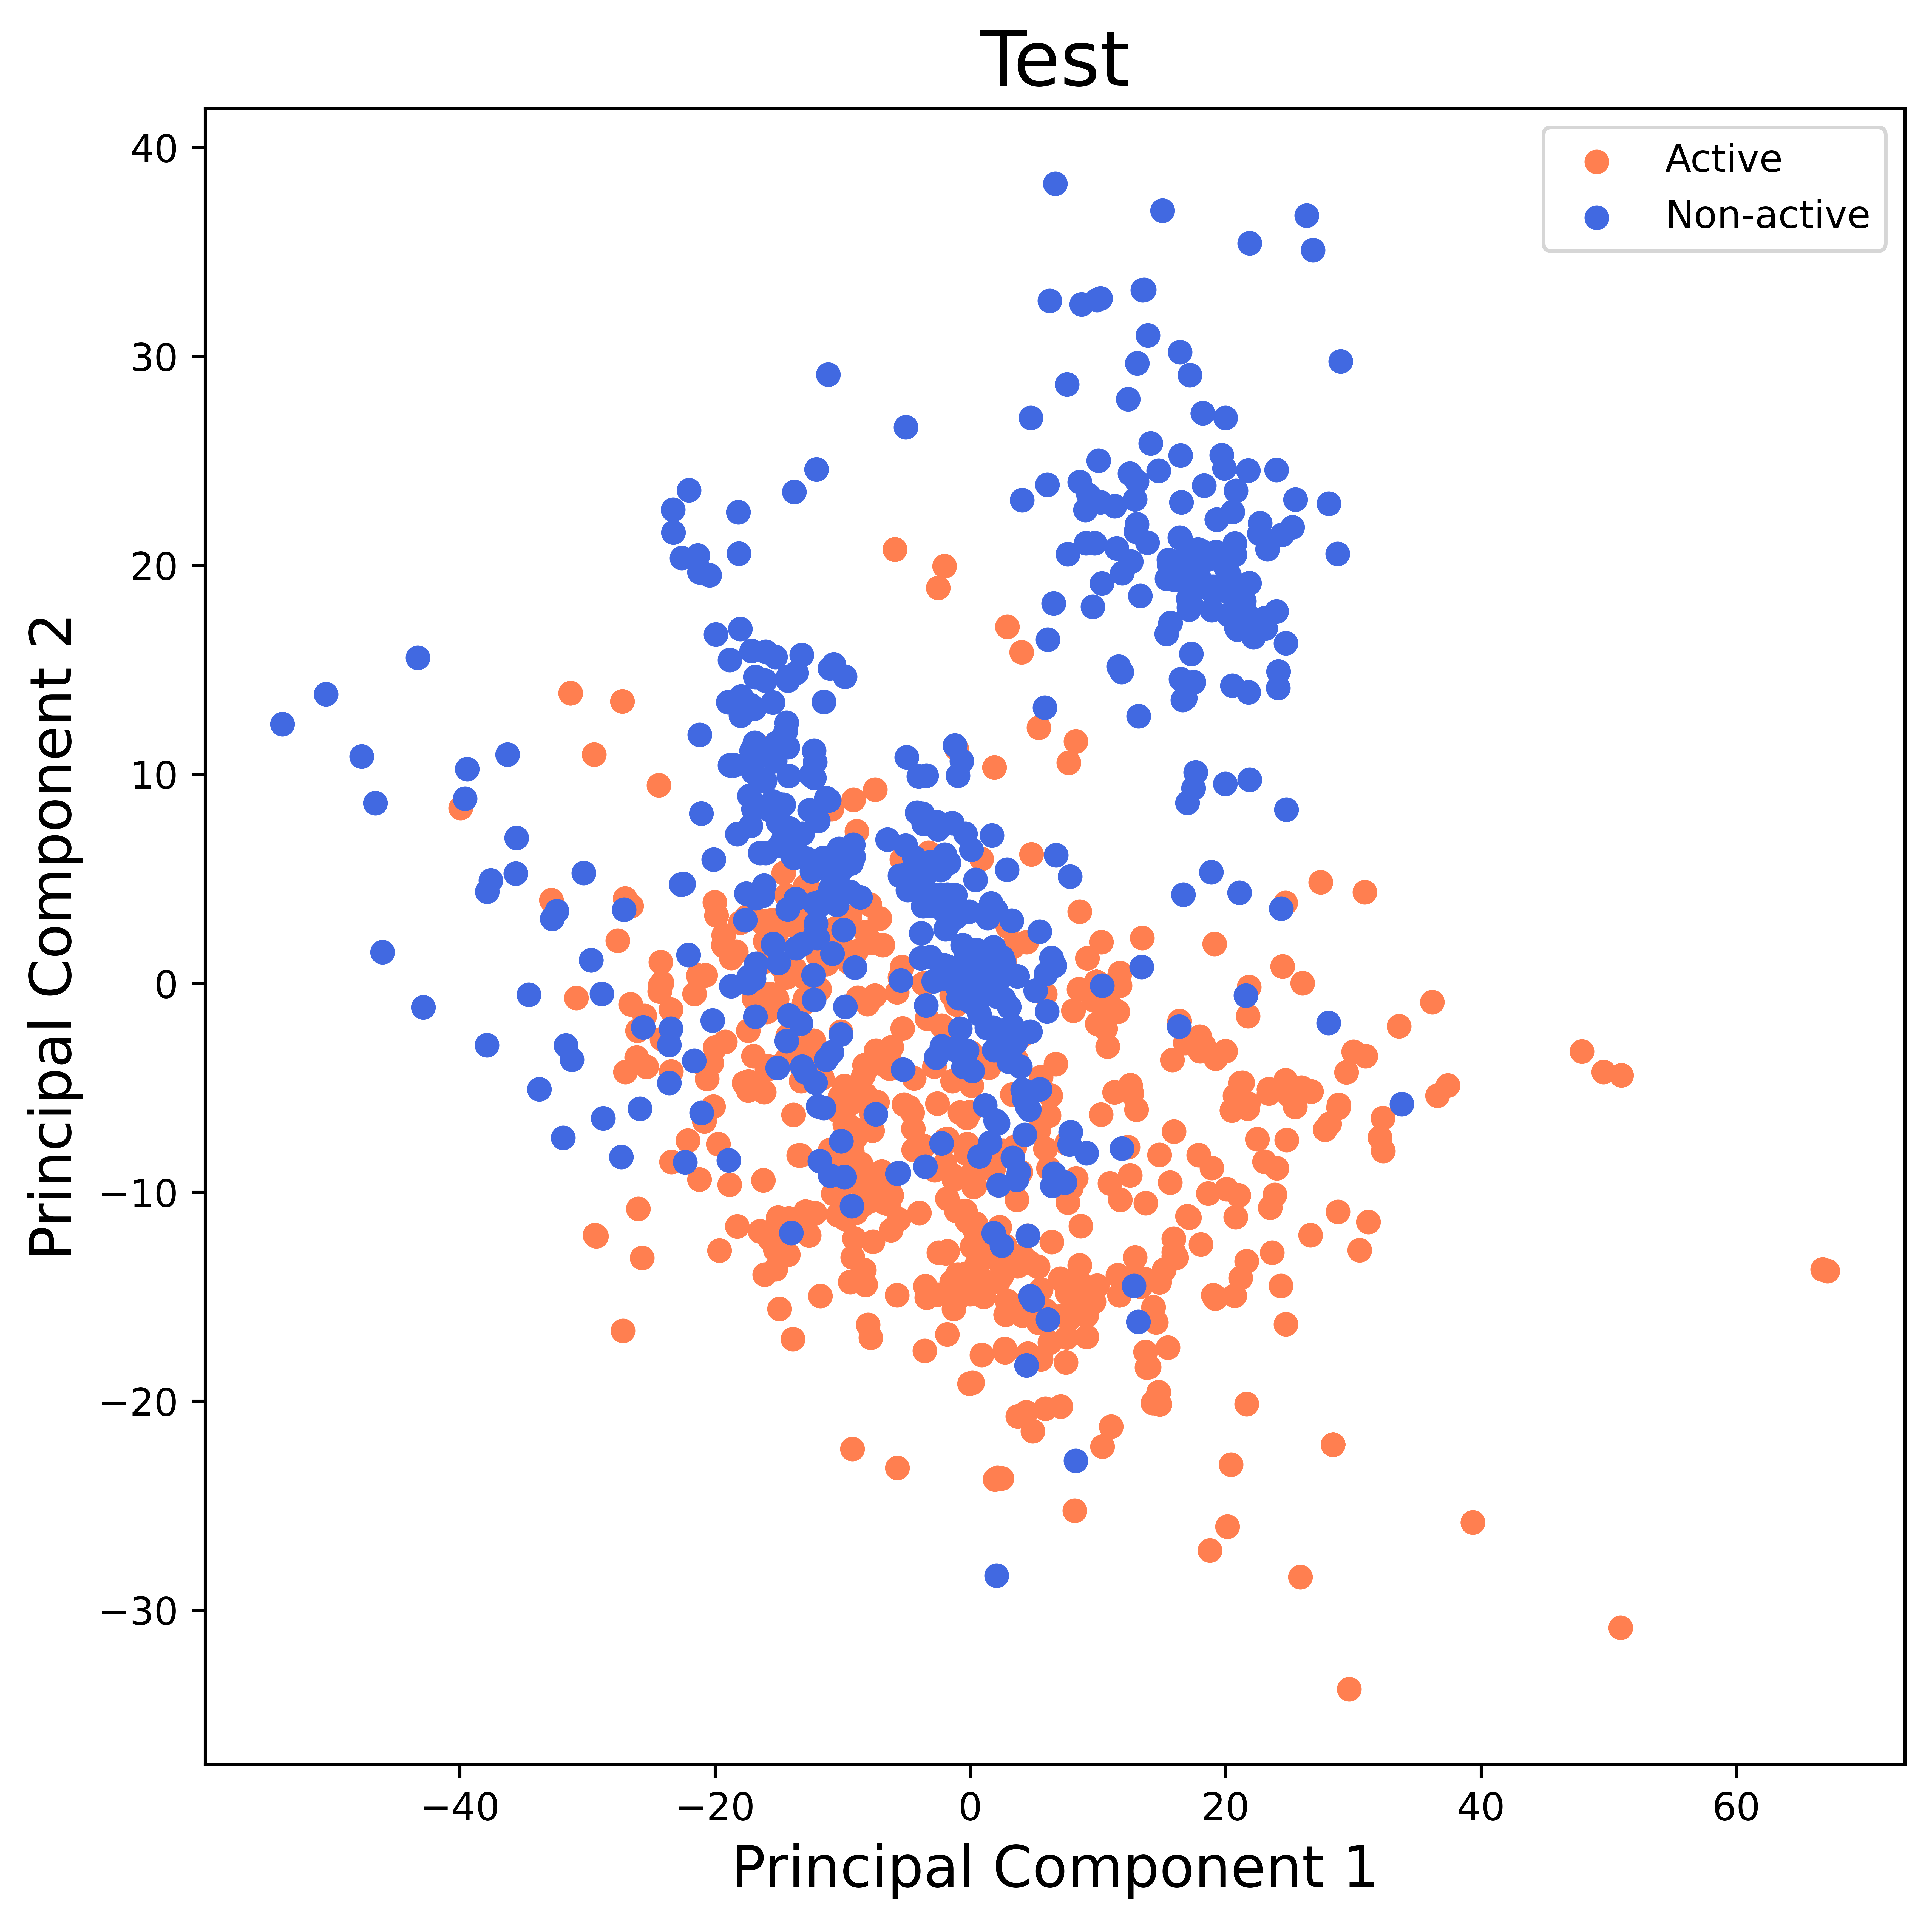

In [34]:
fig = plt.figure(figsize = (8,8), dpi=1000)
ax = fig.add_subplot(1,1,1) 
ax.set_title('Test', fontsize = 20)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['Active','Non-active']
finalDf.loc[finalDf['active'] == 0, 'active'] = 'Non-active'
finalDf.loc[finalDf['active'] == 1, 'active'] = 'Active'
colors = ['coral', 'royalblue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['active'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)
ax.legend(targets)